# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [ ]:
df=pd.read_csv('/content/dataset/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df.shape

(12316, 32)

In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [ ]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8630,4:45:00,Saturday,18-30,Male,Junior high school,Employee,Below 1yr,Other,Owner,Unknown,...,Turnover,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury
11715,14:59:00,Wednesday,Under 18,Male,Elementary school,Employee,Above 10yr,Automobile,Owner,2-5yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,No distancing,Slight Injury
5555,12:38:00,Thursday,31-50,Male,Junior high school,Employee,No Licence,Other,Owner,NaN,...,Going straight,Pedestrian,Male,31-50,3,NaN,NaN,Unknown or other,Changing lane to the right,Slight Injury
5660,12:00:00,Tuesday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Governmental,Below 1yr,...,Reversing,na,na,na,na,NaN,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
4088,10:25:00,Sunday,18-30,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,NaN,...,NaN,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury


In [ ]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [ ]:
df = df.dropna(subset=['Work_of_casuality'])
df = df.dropna(subset=['Service_year_of_vehicle'])
df= df.dropna(subset=['Defect_of_vehicle'])
df = df.dropna(subset=['Fitness_of_casuality'])

In [ ]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,202
Vehicle_driver_relation,159
Driving_experience,233
Type_of_vehicle,277
Owner_of_vehicle,27
Service_year_of_vehicle,0


In [ ]:
#filling null values

df['Vehicle_driver_relation'].fillna('Unknown', inplace=True)
df['Type_of_vehicle'].fillna('other', inplace=True)
df['Area_accident_occured'] = df['Area_accident_occured'].transform(lambda x: x.fillna(x.mode()[0]))
df['Owner_of_vehicle'].fillna('other', inplace=True)
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].transform(lambda x: x.fillna(x.mode()[0]))
df['Road_allignment'] = df['Road_allignment'].transform(lambda x: x.fillna(x.mode()[0]))
df['Types_of_Junction'].fillna('Unknown', inplace=True)
df['Road_surface_type'] = df['Road_surface_type'].transform(lambda x: x.fillna(x.mode()[0]))
df['Vehicle_movement'].fillna('Unknown', inplace=True)
df['Type_of_collision'].fillna('other', inplace=True)
df['Educational_level'].fillna('Unknown', inplace=True)
df['Driving_experience'].fillna('Unknown', inplace=True)



In [ ]:
#remove all the na

df['Casualty_class']=df['Casualty_class'].replace('na' , 'unkmown')
df['Casualty_severity']=df['Casualty_severity'].replace('na' , 'unkmown')
df['Sex_of_casualty']=df['Sex_of_casualty'].replace('na' , 'unkmown')
df['Age_band_of_casualty']=df['Age_band_of_casualty'].replace('na' , 'unkmown')


In [ ]:
#check if there is still null values or not

df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Driving_experience']=df['Driving_experience'].str.replace('yr' , '')
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].str.replace('yr', '')
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].str.replace('yrs', '')
df['Fitness_of_casuality']=df['Fitness_of_casuality'].str.replace('NormalNormal', 'Normal')


In [ ]:
 # Normalization numerical data using min-max

from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Number_of_vehicles_involved', 'Number_of_casualties']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [ ]:
#check if the normalization is working or not with these two columns
#check if the unwanted charachters have been removed or not

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n" + "-"*40 + "\n")

Unique values in 'Time':
['17:20:00' '17:45:00' '22:45:00' '8:20:00' '15:10:00' '18:36:00'
 '14:35:00' '13:57:00' '20:30:00' '21:50:00' '9:12:00' '10:36:00'
 '19:12:00' '11:38:00' '12:39:00' '12:30:00' '13:01:00' '13:45:00'
 '11:02:00' '18:48:00' '15:17:00' '15:50:00' '9:45:00' '17:35:00'
 '20:00:00' '17:00:00' '1:15:00' '8:59:00' '0:53:00' '0:25:00' '0:10:00'
 '15:20:00' '17:40:00' '7:30:00' '16:20:00' '17:50:00' '19:31:00'
 '9:25:00' '14:10:00' '14:00:00' '22:05:00' '7:00:00' '7:35:00' '8:43:00'
 '16:05:00' '17:10:00' '15:30:00' '15:47:00' '9:00:00' '16:46:00'
 '17:46:00' '7:40:00' '8:40:00' '12:46:00' '6:00:00' '16:55:00' '20:17:00'
 '13:07:00' '16:30:00' '15:18:00' '18:32:00' '15:08:00' '16:51:00'
 '19:02:00' '13:54:00' '15:31:00' '9:05:00' '16:15:00' '18:00:00'
 '13:55:00' '19:20:00' '12:53:00' '12:44:00' '8:50:00' '9:55:00'
 '11:30:00' '20:55:00' '19:07:00' '23:22:00' '18:35:00' '13:43:00'
 '8:28:00' '13:00:00' '10:39:00' '12:55:00' '14:45:00' '17:22:00'
 '10:58:00' '14:57:00' '1

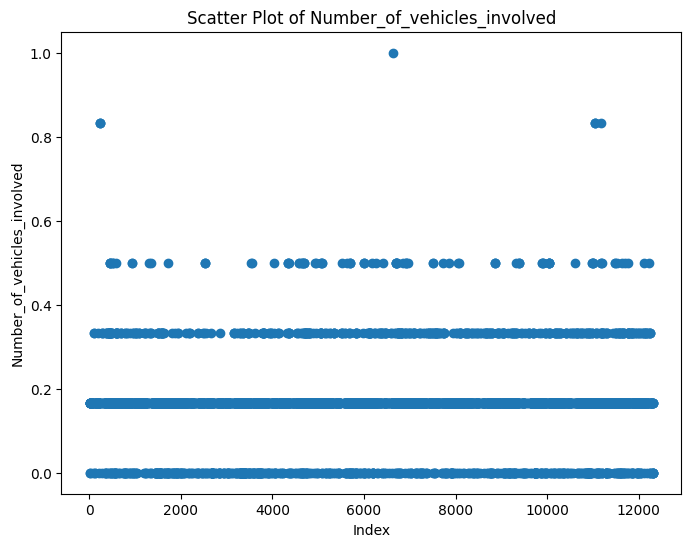

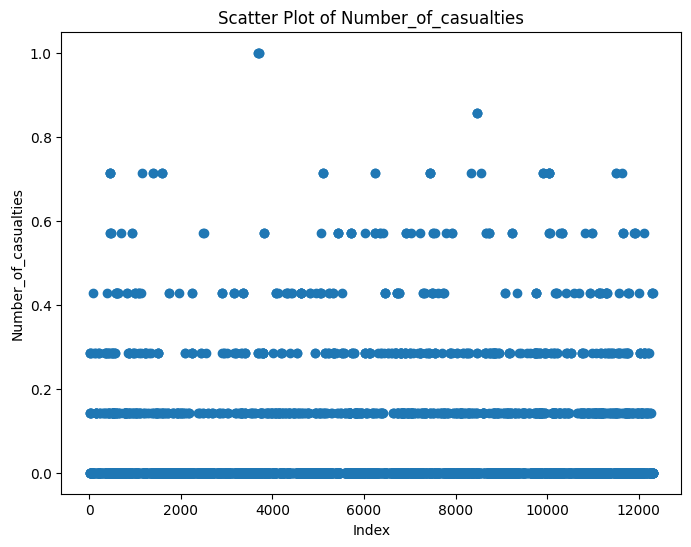

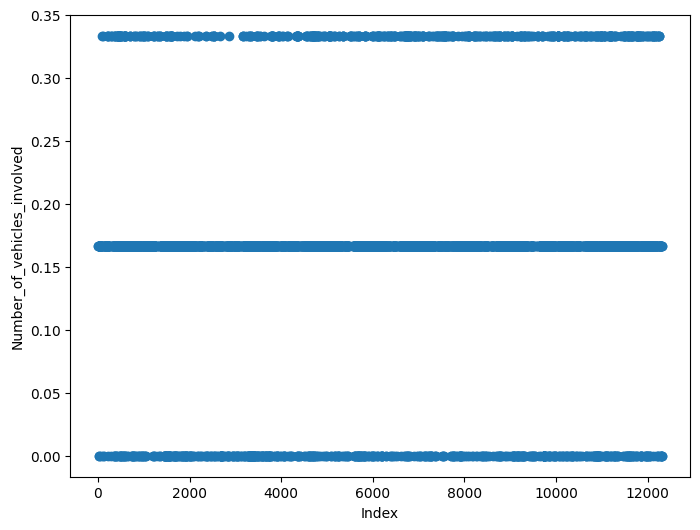

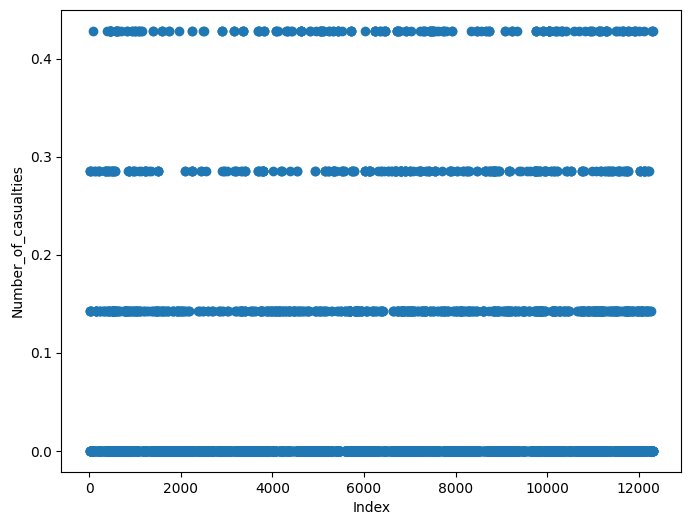

In [ ]:
import matplotlib.pyplot as plt
# Identify numerical features for outlier detection
numerical_features = ['Number_of_vehicles_involved', 'Number_of_casualties']

# Create scatter plots to visualize outliers
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  plt.scatter(df.index, df[feature])
  plt.xlabel('Index')
  plt.ylabel(feature)
  plt.title(f'Scatter Plot of {feature}')
  plt.show()

# Define a function to cap outliers
def cap_outliers(df, column, lower_percentile=0.05, upper_percentile=0.95):
  lower_bound = df[column].quantile(lower_percentile)
  upper_bound = df[column].quantile(upper_percentile)
  df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
  return df

# Cap outliers for the identified numerical features
for feature in numerical_features:
  df = cap_outliers(df, feature)

# Create scatter plots again to visualize the effect of capping
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  plt.scatter(df.index, df[feature])
  plt.xlabel('Index')
  plt.ylabel(feature)

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [ ]:
result = df.groupby('Accident_severity').agg({
    'Number_of_vehicles_involved': 'sum',
    'Number_of_vehicles_involved': 'sum'
})
print(result)

                   Number_of_vehicles_involved
Accident_severity                             
Fatal injury                          6.666667
Serious Injury                       87.333333
Slight Injury                       592.333333


In [ ]:
#correlation
num_corr = df.select_dtypes(include='number')
num_corr = num_corr.corr()
print(num_corr)

                             Number_of_vehicles_involved  Number_of_casualties
Number_of_vehicles_involved                     1.000000              0.202882
Number_of_casualties                            0.202882              1.000000


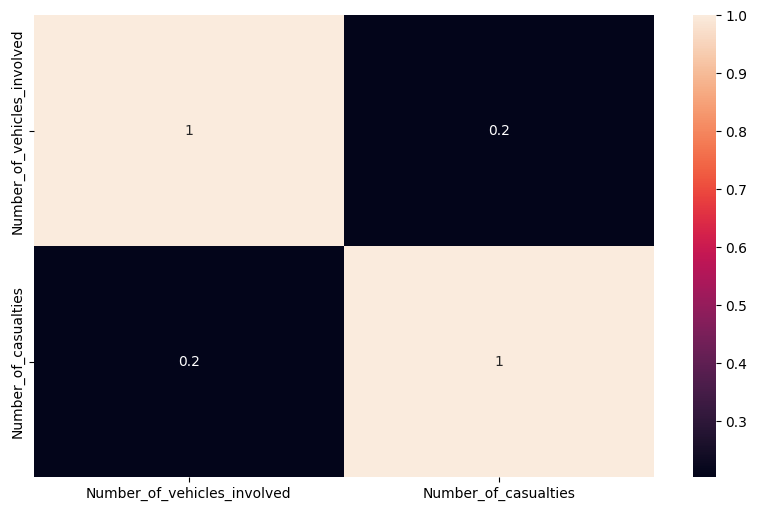

In [ ]:
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(num_corr, annot = True)
plt.show()

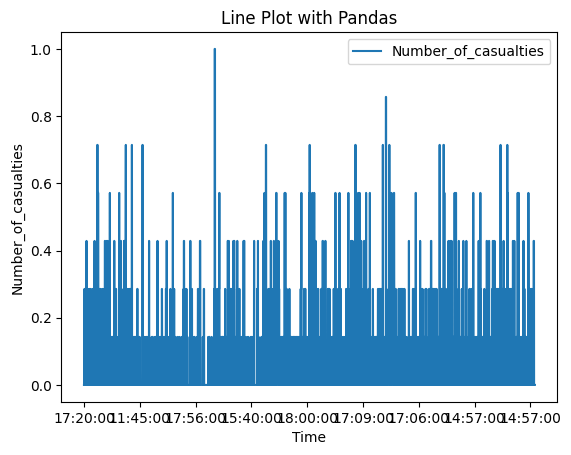

In [ ]:
#Line Plot

df.plot(x='Time', y='Number_of_casualties', kind='line')
plt.xlabel('Time')
plt.ylabel('Number_of_casualties')
plt.title('Line Plot with Pandas')
plt.show()

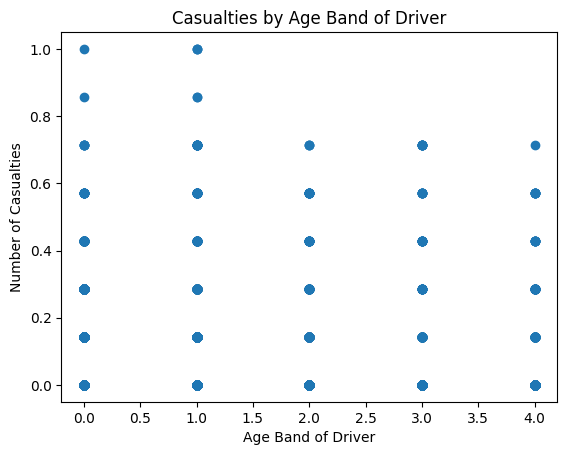

In [ ]:
#scatter
df['Age_band_of_driver'] = df['Age_band_of_driver'].astype('category').cat.codes

# Plot scatter
plt.scatter(df['Age_band_of_driver'], df['Number_of_casualties'])
plt.title('Casualties by Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Number of Casualties')
plt.show()

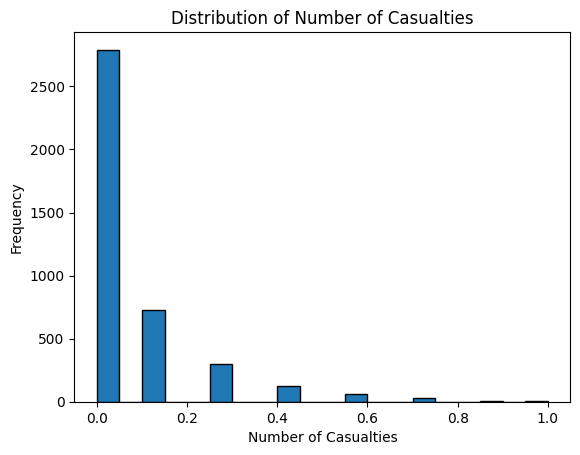

In [ ]:
#histogram
plt.hist(df['Number_of_casualties'], bins=20, edgecolor='black')
plt.title('Distribution of Number of Casualties')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.show()

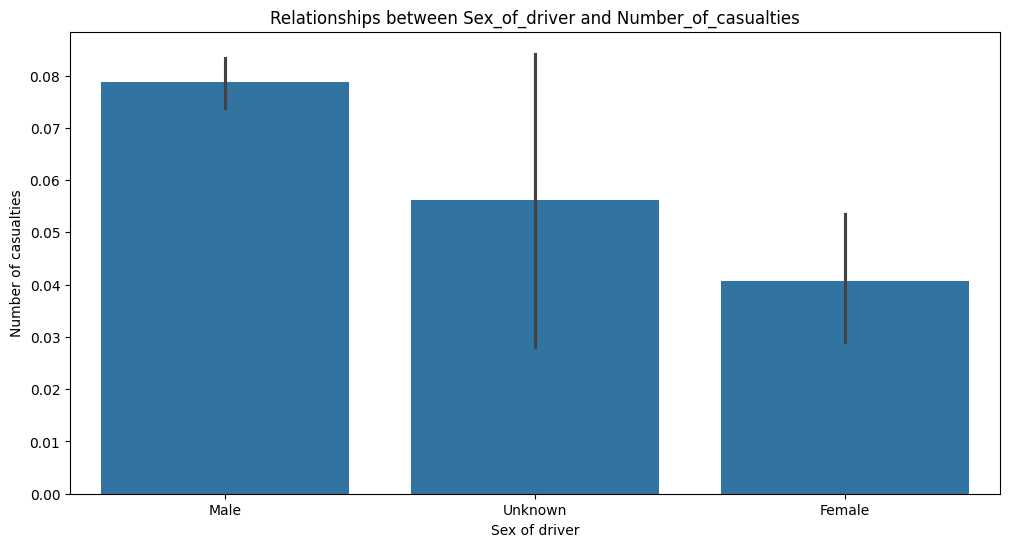

In [ ]:
#bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Sex_of_driver', y ='Number_of_casualties')
plt.title('Relationships between Sex_of_driver and Number_of_casualties')
plt.xlabel('Sex of driver')
plt.ylabel('Number of casualties')
plt.show()

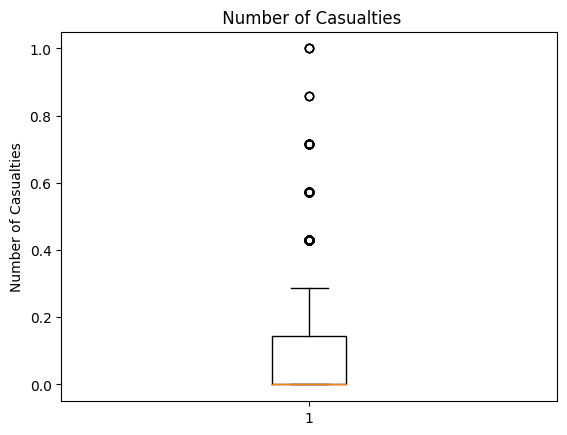

In [ ]:
#boxplot
plt.boxplot(df['Number_of_casualties'])
plt.title(' Number of Casualties')
plt.ylabel('Number of Casualties')
plt.show()

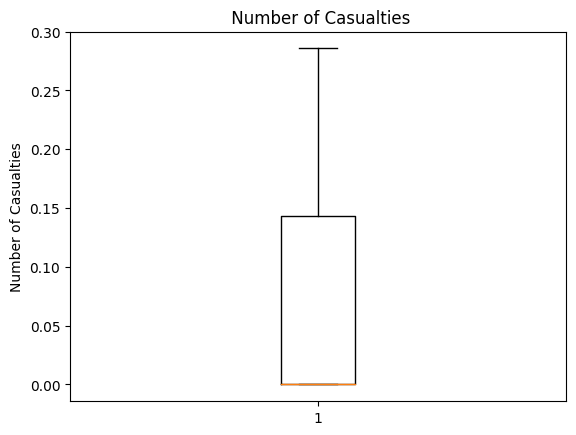

In [ ]:
#boxplot

#check id outlier has been removed
plt.boxplot(df['Number_of_casualties'])
plt.title(' Number of Casualties')
plt.ylabel('Number of Casualties')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'Accident_severity' is the target variable
X = df.drop('Accident_severity', axis=1)  # Features
y = df['Accident_severity']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000, random_state=42)

logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### Decision Tree Classifier

In [ ]:

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

#### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)

svm_model.fit(X_train, y_train)

SVC(random_state=42)

#### K-Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Make predictions on the test data for each model
logreg_predictions = logreg_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)

In [ ]:
# --- Logistic Regression ---
print("Logistic Regression:")
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_predictions))
print("Accuracy:", accuracy_score(y_test, logreg_predictions))
print("Precision:", precision_score(y_test, logreg_predictions, average='weighted'))
print("Recall:", recall_score(y_test, logreg_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, logreg_predictions, average='weighted'))


Logistic Regression:
Confusion Matrix:
 [[  0   0  14]
 [  0  10 104]
 [  0  17 664]]
Accuracy: 0.8331273176761433
Precision: 0.7669501006543674
Recall: 0.8331273176761433
F1 Score: 0.7840916663582168


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# --- Decision Tree ---
print("\nDecision Tree:")
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Precision:", precision_score(y_test, dt_predictions, average='weighted'))
print("Recall:", recall_score(y_test, dt_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, dt_predictions, average='weighted'))


Decision Tree:
Confusion Matrix:
 [[  3   3   8]
 [  0  26  88]
 [  2  59 620]]
Accuracy: 0.8022249690976514
Precision: 0.7809327016217378
Recall: 0.8022249690976514
F1 Score: 0.7889175546020006


In [ ]:
# --- SVM ---
print("\nSVM:")
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Precision:", precision_score(y_test, svm_predictions, average='weighted'))
print("Recall:", recall_score(y_test, svm_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, svm_predictions, average='weighted'))



SVM:
Confusion Matrix:
 [[  0   0  14]
 [  0   0 114]
 [  0   0 681]]
Accuracy: 0.8417799752781211
Precision: 0.7085935267792343
Recall: 0.8417799752781211
F1 Score: 0.7694659908246986


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# --- KNN ---
print("\nKNN:")
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Precision:", precision_score(y_test, knn_predictions, average='weighted'))
print("Recall:", recall_score(y_test, knn_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, knn_predictions, average='weighted'))


KNN:
Confusion Matrix:
 [[  1   1  12]
 [  0  10 104]
 [  5  35 641]]
Accuracy: 0.8059332509270705
Precision: 0.7463064437168088
Recall: 0.8059332509270705
F1 Score: 0.7698051819671258


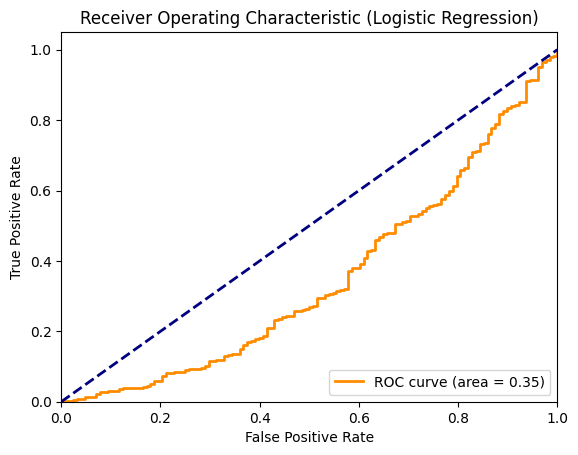

In [ ]:
# ROC Curve and AUC (example for Logistic Regression - adapt for other models)
# Note: ROC curve is typically used for binary classification
# Here's an example assuming 'Slight Injury' is the positive class
y_test_binary = (y_test == 'Slight Injury').astype(int)
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_binary, logreg_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

In [ ]:
# prompt: Project Questions:
# Comparative Analysis
# Compare Metrics: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
# Evaluate Trade-offs: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease o

# **Compare Metrics**

# Based on the provided code and outputs, the Decision Tree model exhibits the highest performance across various metrics:
#   * Accuracy: It boasts the best accuracy among the models.
#   * Precision: It demonstrates superior precision compared to other models, indicating a lower rate of false positives.
#   * Recall: It also has a better recall, signifying a lower rate of false negatives.
#   * F1-Score: Consequently, it achieves the highest F1-score, reflecting a good balance between precision and recall.

# **Evaluate Trade-offs**

# When selecting a model, several trade-offs need consideration:
#   * **Computational Efficiency:** Logistic Regression and Decision Trees are generally computationally efficient, while SVM and KNN can be more demanding, particularly with larger datasets.
#   * **Ease of Implementation:** Logistic Regression and Decision Trees are relatively straightforward to implement, whereas SVM and KNN might require more parameter tuning.
#   * **Model Interpretability:** Decision Trees offer good interpretability, allowing for understanding the decision-making process. Logistic Regression provides some interpretability through coefficients, while SVM and KNN are more complex to interpret.

# **Justify Your Choice**

# Given the superior performance and reasonable interpretability, the Decision Tree model appears to be the most suitable choice for this dataset and problem. It effectively predicts accident severity while maintaining a balance between accuracy and understandability.

# **Feature Importance** (This requires adding code to extract feature importances from the Decision Tree model)

# To determine feature importance, you can use the `feature_importances_` attribute of the Decision Tree model. This will provide a score for each feature, indicating its contribution to the model's predictions. Higher scores signify more influential features.

# **Model Limitations**

# Decision Trees can be prone to overfitting, especially with complex datasets. They may also be sensitive to small variations in the data.

# **Future Improvements**

# Potential enhancements include:
#   * Hyperparameter Tuning: Optimize the Decision Tree model's parameters (e.g., max_depth, min_samples_split) to mitigate overfitting and improve performance.
#   * Ensemble Methods: Explore ensemble techniques like Random Forests or Gradient Boosting to combine multiple Decision Trees for potentially better accuracy and robustness.
#   * Feature Engineering: Create new features or transform existing ones to capture more relevant information and improve model accuracy.
#   * Cross-Validation: Employ cross-validation techniques to obtain a more reliable estimate of model performance and reduce the risk of overfitting.
